# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root");
//TFile *file = TFile::Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will plot first an <b>"event"</b> variable: the number of primary vertices: 

In [4]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas.

In [5]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);

Now we define a histogram that will later be placed on this canvas. Its name is NPV and the header of the histogram is Example plot: Number of primary vertices. The three following arguments indicate that this histogram contains 50 so called bins which have a range from 1 to 50.

In [6]:
TH1F *hist_npv = new TH1F("NPV","Example plot: Number of primary vertices; NPV ; Events ",50,1,50);

The following lines are a loop that goes over the data that is stored in the tree and fills the histogram that we already defined. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word</p>
__Done!__.

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv->Fill(npv);
}

std::cout << "Done!" << std::endl;

Done!


<p>After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies:</p>

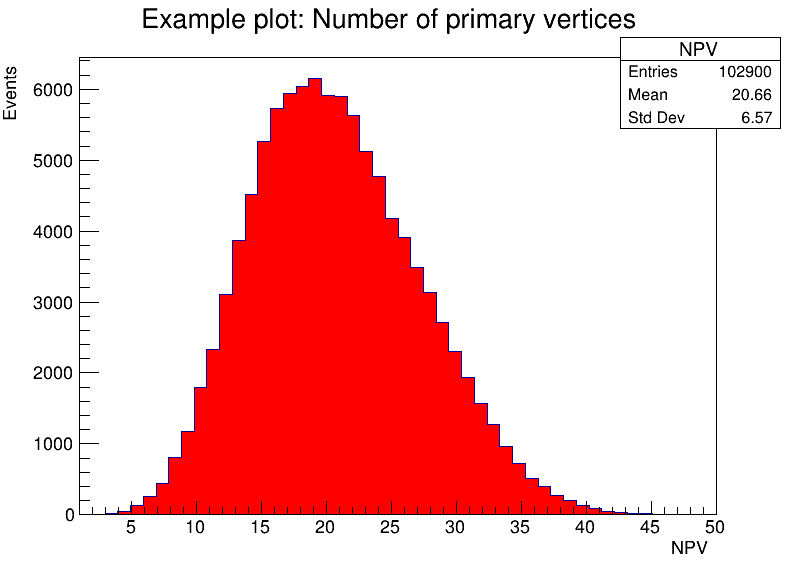

In [8]:
hist_npv->SetFillColor(kRed);
hist_npv->Draw();
canvas->Draw();

In [9]:
Float_t scale = hist_npv->Integral();
hist_npv->Scale(1/scale);
hist_npv->SetFillColor(2);

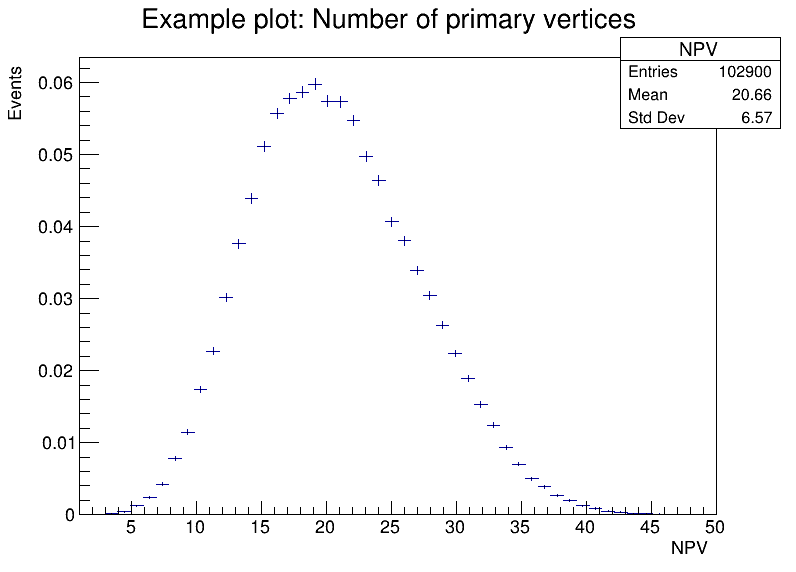

In [10]:
hist_npv->Draw();
canvas->Draw();

<b>Excercises: 
    1. Plot the number of average interactions per bunch-crossing (mu_average)
    2. Make a 2D histogram of NPV vs. mu
</b>

1. To plot mu_average we define a new event variable: mu_av

In [11]:
Float_t mu_av = -1.0;
tree->SetBranchAddress("mu_average", &mu_av);

Now, we define a new histogram

In [12]:
TH1F *hist_mu_av = new TH1F("mu_average","Second plot: Number of interactions per bunch-crossing; mu_average ; Events ",80,5,80);

Now, we fill the histogram

In [13]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_mu_av->Fill(mu_av);
}

std::cout << "Done!" << std::endl;

Done!


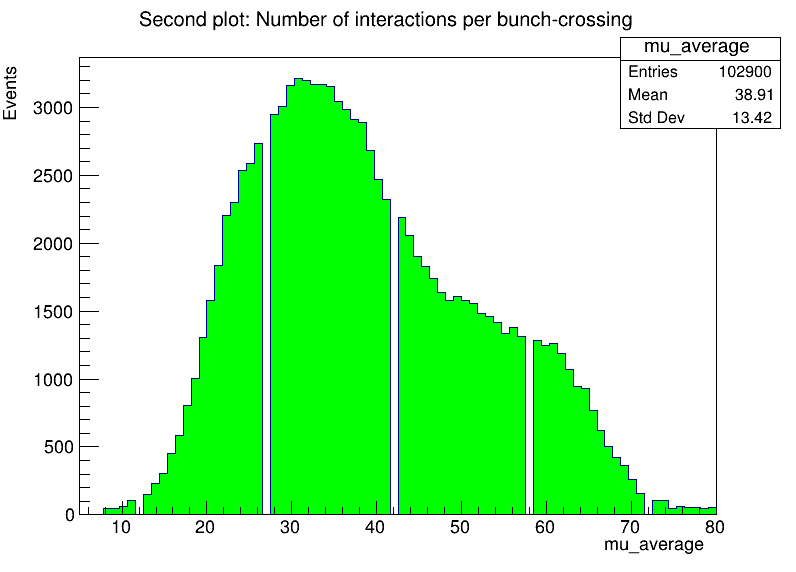

In [14]:
hist_mu_av->SetFillColor(03);
hist_mu_av->Draw();
canvas->Draw();

2. Now, to plot a 2D histogram with the variables we already have, NPV and mu_average, we define a 2D histogram 

In [15]:
TH2F *hist_npv_muav = new TH2F("NPV vs Mu", "NPV vs Mu_average 2D histogram; NPV; mu_average;Events", 50, 1, 50, 80, 5, 80 );

In [16]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv_muav->Fill(npv, mu_av);
    
}

std::cout << "Done!" << std::endl;

Done!


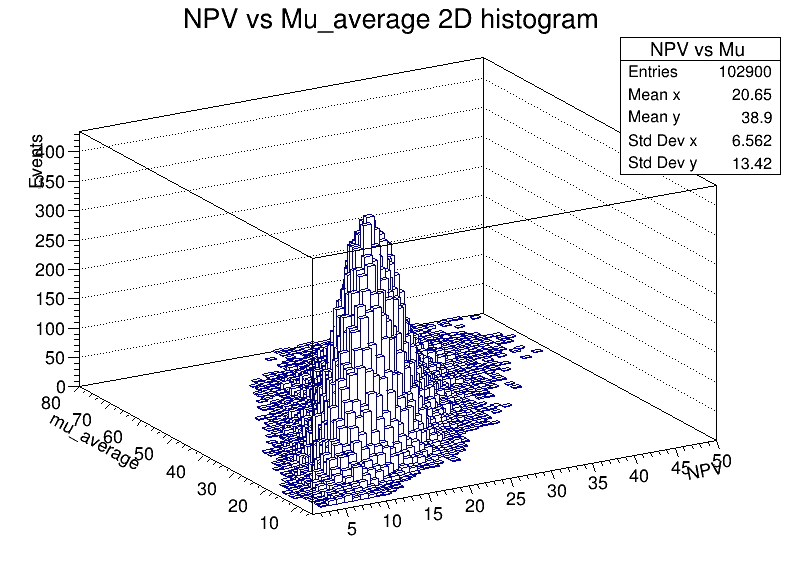

In [17]:
hist_npv_muav->SetOption("lego01");
hist_npv_muav->Draw();
canvas->Draw();

Some branches are not event variables, but objects with some kinematical infomation. They are stored in vectors. For example tracks and clusters. We will create two histograms to store the number of tracks and clusters in each event. 

In [18]:
TH1F *hist_nTrks = new TH1F("NTracks","Example plot: Number of tracks; NTracks ; Events ",50,50,1200);
TH1F *hist_nCltrs = new TH1F("NClusters","Example plot: Number of clusters; NClusters ; Events ",50,100,1200);

Now we activate two branches

In [19]:
vector<float> *tracks_pt;
vector<float> *clusters_pt;

tree->SetBranchAddress("Tracks_pt", &tracks_pt);
tree->SetBranchAddress("Clusters_pt", &clusters_pt);

For each event, fill the histograms with the size of the vectors

In [20]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_nTrks->Fill(tracks_pt->size());
    hist_nCltrs->Fill(clusters_pt->size());

}

std::cout << "Done!" << std::endl;

Done!


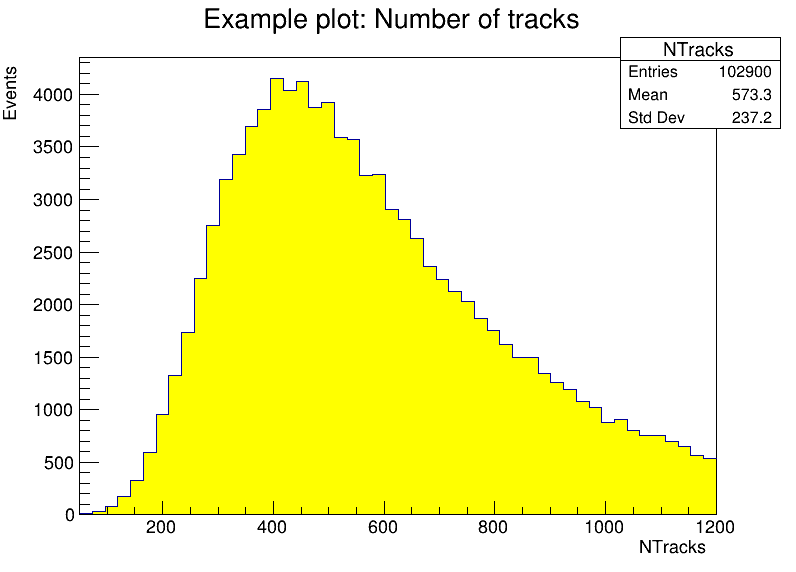

In [21]:
hist_nTrks->SetFillColor(05);
hist_nTrks->Draw();
canvas->Draw();

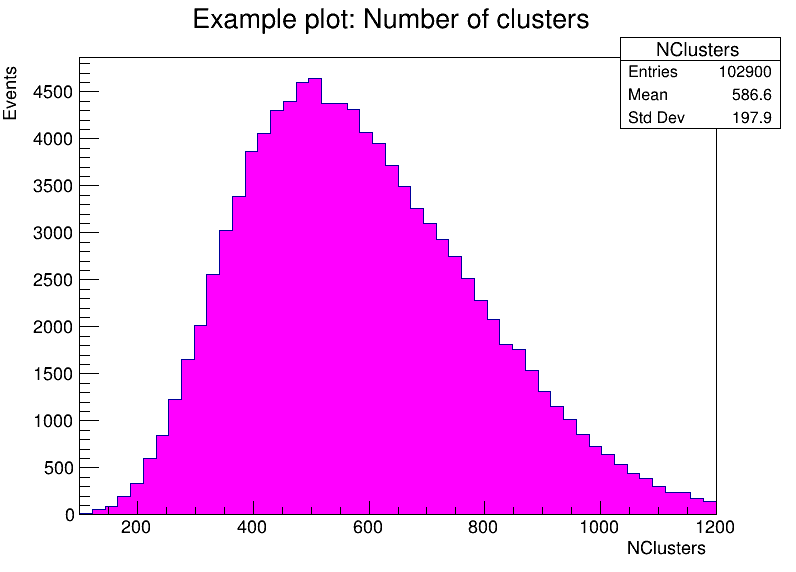

In [22]:
hist_nCltrs->SetFillColor(06);
hist_nCltrs->Draw();
canvas->Draw();

<b>Excercise: 
    3. Make a 2D histogram of NPV and mu vs. nTracks and nClusters
</b>

We have all the branches, so we only need to create the histograms

In [27]:
TH2F *hist_npv_tracks = new TH2F("NPV vs nTracks", "Plot of NPV vs nTracks; NPV; number of Tracks; Events", 50, 1, 50, 50, 0, 1000 );
TH2F *hist_npv_clusters = new TH2F("NPV vs nClusters", "Plot of NPV vs nClusters; NPV; number of Clusters; Events", 50, 1, 50, 50, 0, 1000 );
TH2F *hist_muav_tracks = new TH2F("Mu vs nTracks", "Plot of Mu_average vs nTracks; Mu_average; number of Tracks; Events", 80, 5, 80, 50, 0, 1000 );
TH2F *hist_muav_clusters = new TH2F("Mu vs nClusters", "Plot of Mu_average vs nClusters; Mu_average; number of Clusters; Events", 80, 5, 80, 50, 0, 1000 );

Warning in <TFile::Append>: Replacing existing TH1: NPV vs nTracks (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: NPV vs nClusters (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Mu vs nTracks (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Mu vs nClusters (Potential memory leak).


Fill them

In [30]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv_tracks->Fill(npv, tracks_pt->size());
    hist_npv_clusters->Fill(npv, clusters_pt->size());
    hist_muav_tracks->Fill(mu_av, tracks_pt->size());
    hist_muav_clusters->Fill(mu_av, clusters_pt->size());

}

std::cout << "Done!" << std::endl;

Done!


And plot them

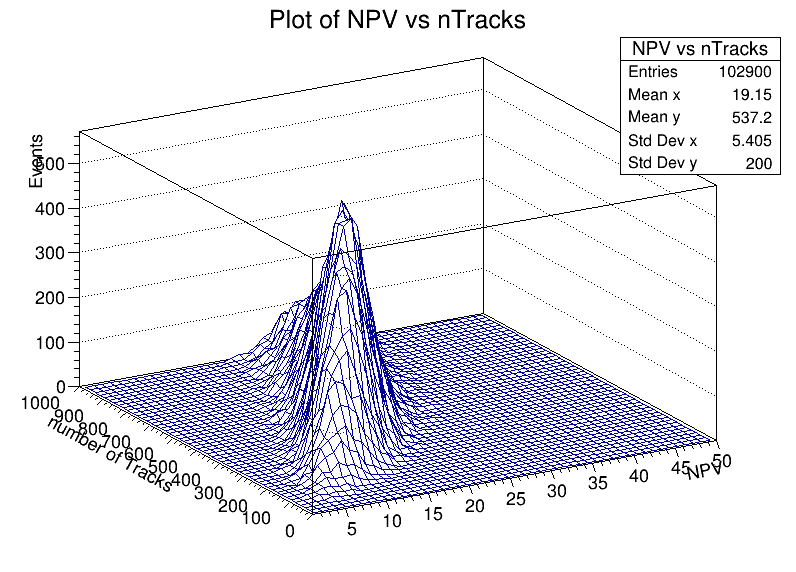

In [31]:
hist_npv_tracks->SetOption("surf");
hist_npv_tracks->Draw();
canvas->Draw();

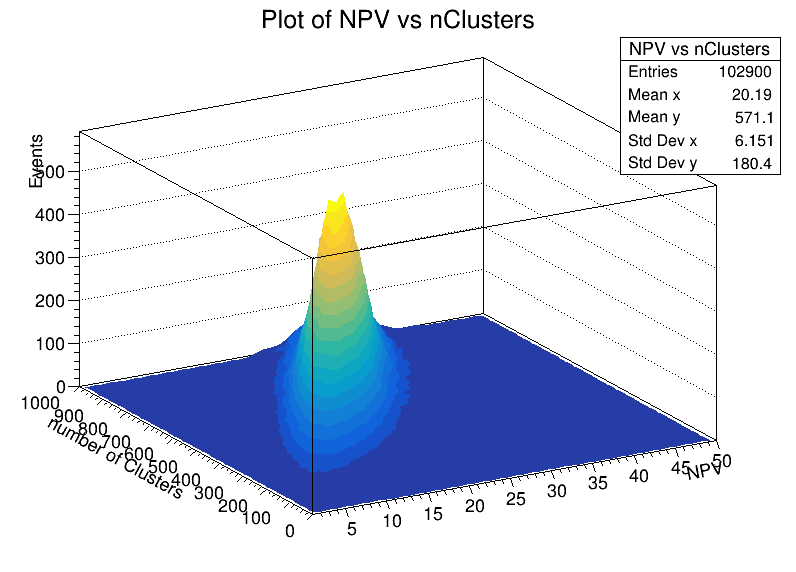

In [32]:
hist_npv_clusters->SetOption("surf2");
hist_npv_clusters->Draw();
canvas->Draw();

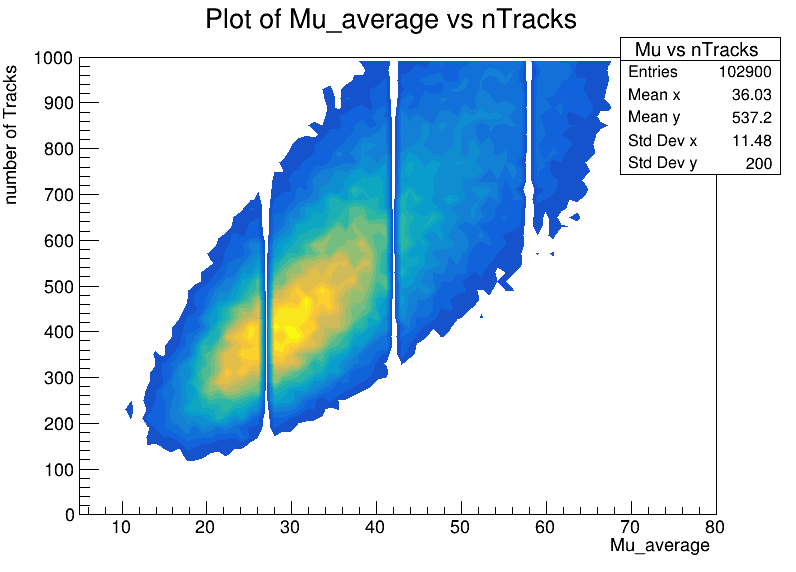

In [33]:
hist_muav_tracks->SetOption("cont0");
hist_muav_tracks->Draw();
canvas->Draw();

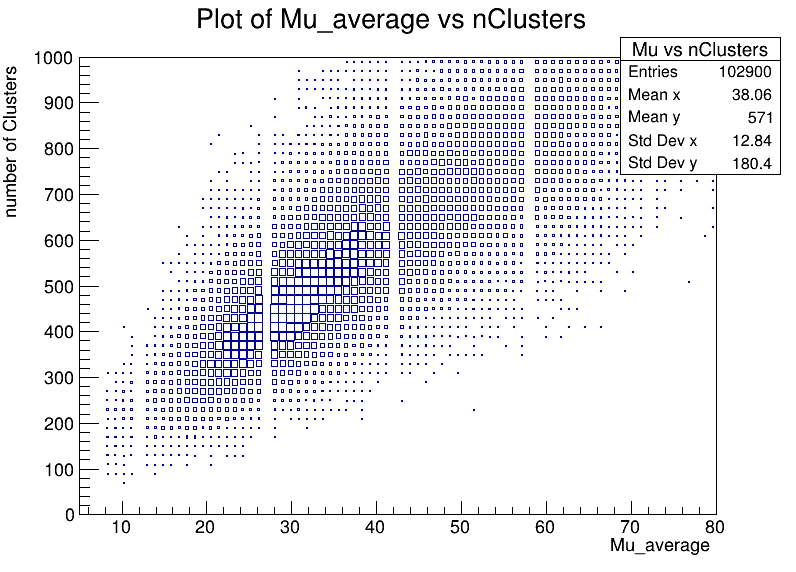

In [34]:
hist_muav_clusters->SetOption("box");
hist_muav_clusters->Draw();
canvas->Draw();

Now let us plot the pT of the "lead" track:

In [35]:
TH1F *hist_lead_track_pT = new TH1F("Lead_Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,100,1000);

In [36]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_pt->size(); tr++)
    {
        hist_lead_track_pT->Fill(tracks_pt->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


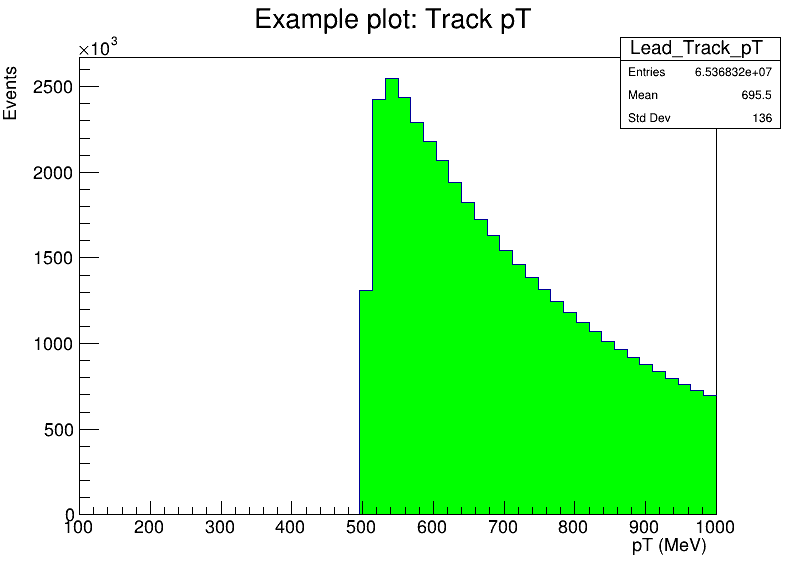

In [37]:
hist_lead_track_pT->SetFillColor(kGreen);
hist_lead_track_pT->Draw();
canvas->Draw();

<b>Excercises: 
4. Plot all track and cluster variables
5. Interpret the meaning of each variable
6. What is "Particle PDG ID"?
</b>

4 First we activate the branches for the track variables 

In [41]:
vector<float> *tracks_eta;
vector<float> *tracks_phi;
vector<float> *tracks_m;
vector<float> *tracks_vtx;

tree->SetBranchAddress("Tracks_eta", &tracks_eta);
tree->SetBranchAddress("Tracks_phi", &tracks_phi);
tree->SetBranchAddress("Tracks_m", &tracks_m);
tree->SetBranchAddress("Tracks_vtx", &tracks_vtx);

create the histograms

In [78]:
TH1F *hist_track_eta = new TH1F("Track_eta","Track eta; eta ; Events ",50,0,3);
TH1F *hist_track_phi = new TH1F("Track_phi","Track phi; phi ; Events ",50,0,3.5);
TH1F *hist_track_m = new TH1F("Track_m","Track m; m ; Events ",50,100,200);
TH1F *hist_track_vtx = new TH1F("Track_vtx","Track vtx; vtx ; Events ",50,0,20);

Warning in <TFile::Append>: Replacing existing TH1: Track_eta (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Track_phi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Track_m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Track_vtx (Potential memory leak).


fill them

In [79]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_eta->size(); tr++)
    {
        hist_track_eta->Fill(tracks_eta->at(tr));
    }
    for(int tr=0; tr<tracks_phi->size(); tr++)
    {
        hist_track_phi->Fill(tracks_phi->at(tr));
    }
    for(int tr=0; tr<tracks_m->size(); tr++)
    {
        hist_track_m->Fill(tracks_m->at(tr));
    }
    for(int tr=0; tr<tracks_vtx->size(); tr++)
    {
        hist_track_vtx->Fill(tracks_vtx->at(tr));
    }


}

std::cout << "Done!" << std::endl;

Done!


and plot them

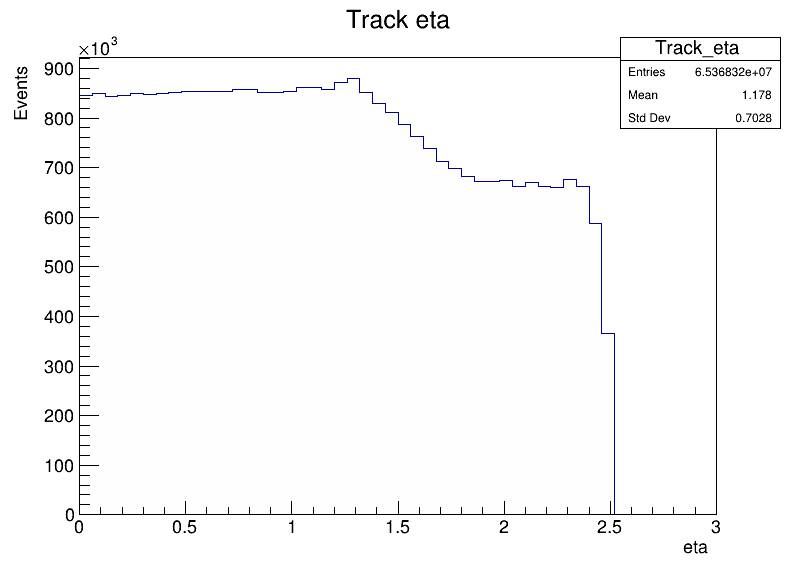

In [59]:
hist_track_eta->SetFillColor(10);
hist_track_eta->Draw();
canvas->Draw();

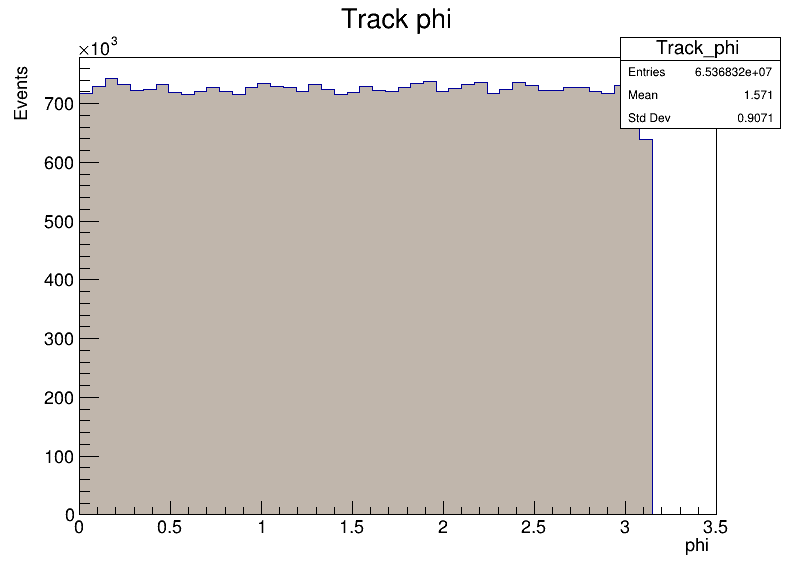

In [60]:
hist_track_phi->SetFillColor(11);
hist_track_phi->Draw();
canvas->Draw();

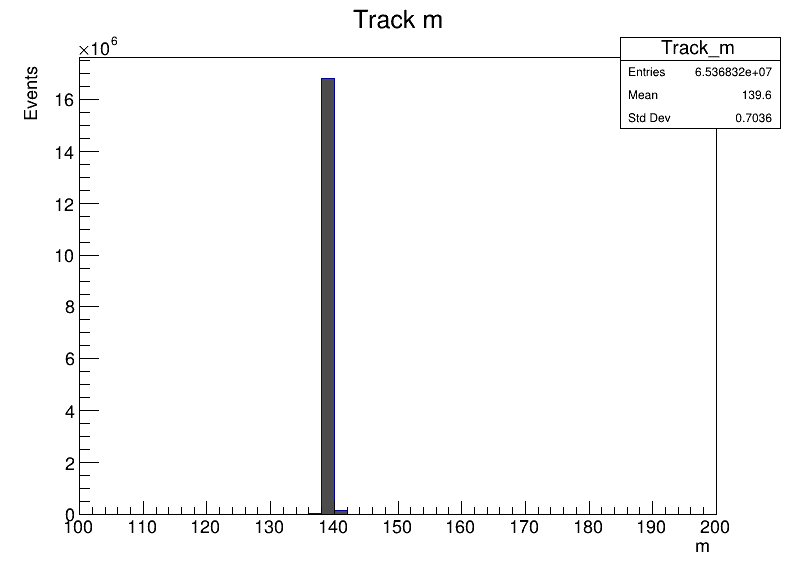

In [61]:
hist_track_m->SetFillColor(12);
hist_track_m->Draw();
canvas->Draw();

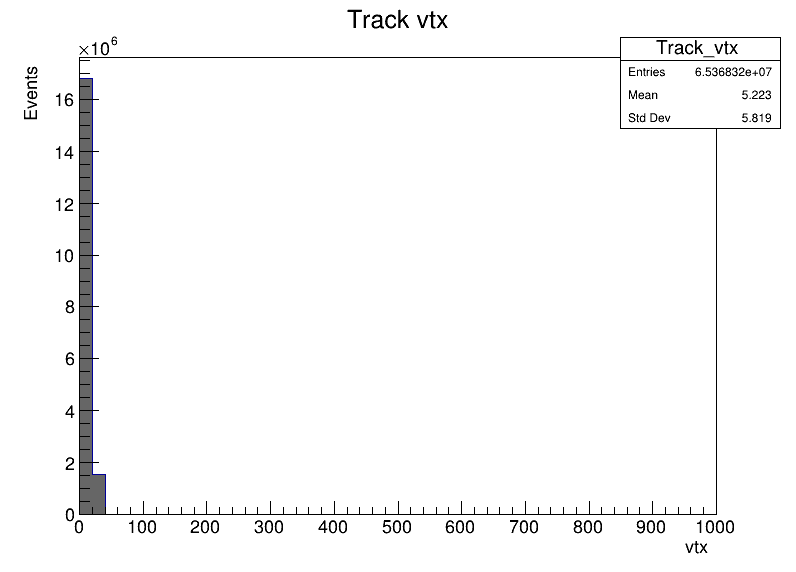

In [80]:
hist_track_vtx->SetFillColor(13);
hist_track_vtx->Draw();
canvas->Draw();

And the same for the cluster variables

In [68]:
vector<float> *clust_eta;
vector<float> *clust_phi;
vector<float> *clust_m;

tree->SetBranchAddress("Clusters_eta", &clust_eta);
tree->SetBranchAddress("Clusters_phi", &clust_phi);
tree->SetBranchAddress("Clusters_m", &clust_m);

In [69]:
TH1F *hist_clust_eta = new TH1F("Cluster_eta","Cluster eta; eta ; Events ",50,0,3);
TH1F *hist_clust_phi = new TH1F("Cluster_phi","Cluster phi; phi ; Events ",50,0,3.5);
TH1F *hist_clust_m = new TH1F("Cluster_m","Cluster m; m ; Events ",50,0,20);

Warning in <TFile::Append>: Replacing existing TH1: Cluster_eta (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Cluster_phi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Cluster_m (Potential memory leak).


In [70]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<clust_eta->size(); tr++)
    {
        hist_clust_eta->Fill(clust_eta->at(tr));
    }
    for(int tr=0; tr<clust_phi->size(); tr++)
    {
        hist_clust_phi->Fill(clust_phi->at(tr));
    }
    for(int tr=0; tr<clust_m->size(); tr++)
    {
        hist_clust_m->Fill(clust_m->at(tr));
    }


}

std::cout << "Done!" << std::endl;

Done!


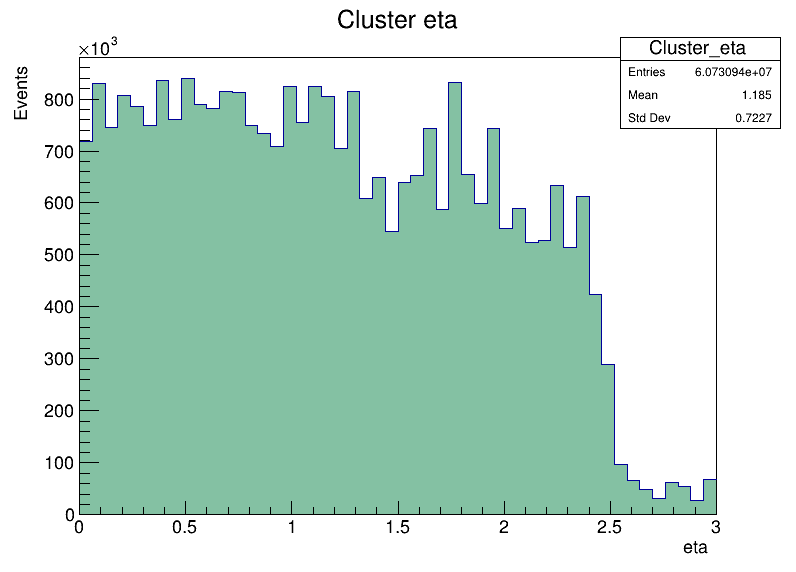

In [76]:
hist_clust_eta->SetFillColor(30);
hist_clust_eta->Draw();
canvas->Draw();

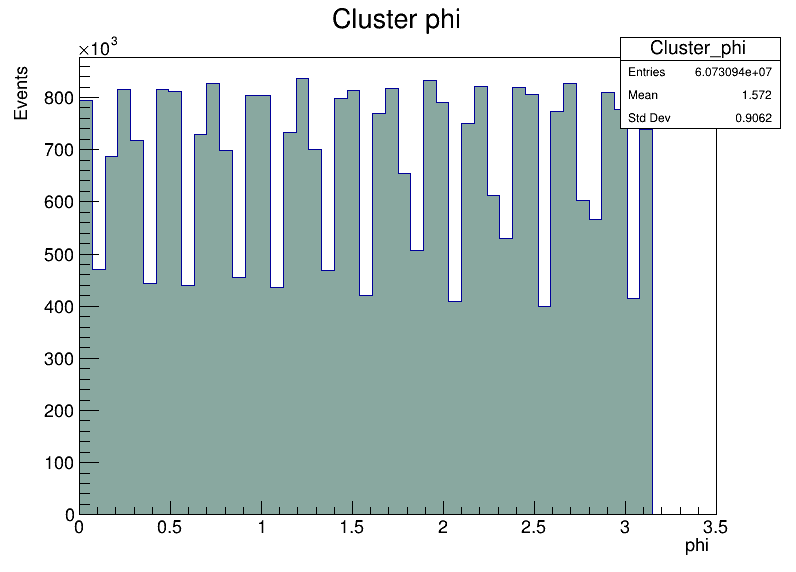

In [77]:
hist_clust_phi->SetFillColor(31);
hist_clust_phi->Draw();
canvas->Draw();

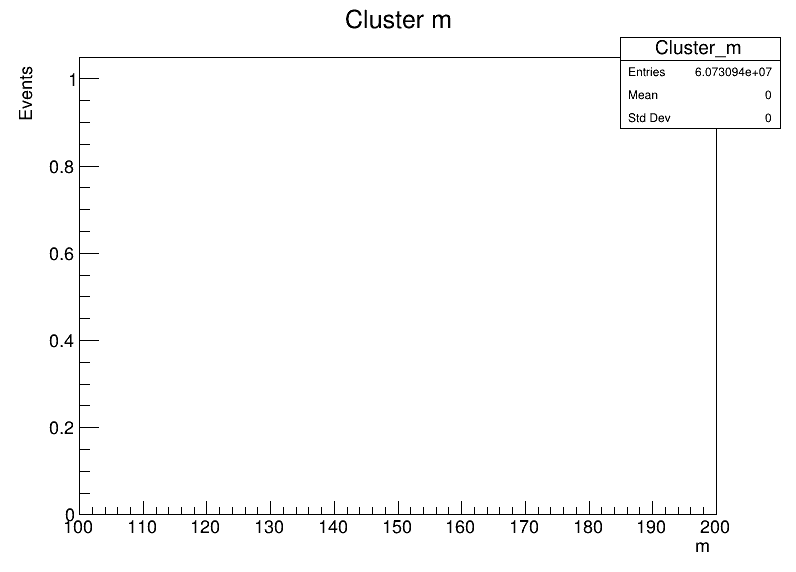

In [74]:
hist_clust_m->SetFillColor(22);
hist_clust_m->Draw();
canvas->Draw();

5 Now, for the meaning of the variables we have:
eta: Pseudorapidity of the particles detected
phi: Polar angle of the detected particle
m:

6 Particles ID, given by the Particle Data Group is a set of numbers given for each particle to uniquely identify them and is used in almost all event generators.